In [173]:
import numpy as np
import sympy as smp
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter

In [174]:
#Constants

g,t = smp.symbols('g t')
m1 , m2 = smp.symbols('m1 m2')

#lengths of the two pendulums
l , h = smp.symbols('l h')

In [175]:
#the varying generalised coordinates (the angles) of the double pendulum

alpha, beta = smp.symbols(r'\alpha, \beta', cls=smp.Function)

alpha = alpha(t)
beta = beta(t)

In [176]:
#Derivatives wrt time t
alpha_d=smp.diff(alpha, t)
beta_d=smp.diff(beta, t)

#Second derivative wrt t
alpha_dd=smp.diff(alpha_d, t)
beta_dd=smp.diff(beta_d, t)

In [177]:
#position vectors in terms of x and y

x1 = l*smp.sin(alpha)
y1 = -l*smp.cos(alpha)

x2= (x1)+(h*smp.sin(beta))
y2 = (y1)+(h*smp.cos(beta))

In [178]:
x2

h*sin(\beta(t)) + l*sin(\alpha(t))

In [179]:
y2

h*cos(\beta(t)) - l*cos(\alpha(t))

In [180]:
#Kinetic Energy
T1 = (1/2) * m1 * (smp.diff(x1, t)**2 + smp.diff(y1, t)**2)
T2 = (1/2) * m2 * (smp.diff(x2, t)**2 + smp.diff(y2, t)**2)
T=T1+T2

#Potential Energy
V1 = m1 * g * y1
V2 = m2 * g * y2 
V=V1+V2

#Lagrangian = KineticEnergy - PotentialEnergy
L = T-V
L

g*l*m1*cos(\alpha(t)) - g*m2*(h*cos(\beta(t)) - l*cos(\alpha(t))) + 0.5*m1*(l**2*sin(\alpha(t))**2*Derivative(\alpha(t), t)**2 + l**2*cos(\alpha(t))**2*Derivative(\alpha(t), t)**2) + 0.5*m2*((-h*sin(\beta(t))*Derivative(\beta(t), t) + l*sin(\alpha(t))*Derivative(\alpha(t), t))**2 + (h*cos(\beta(t))*Derivative(\beta(t), t) + l*cos(\alpha(t))*Derivative(\alpha(t), t))**2)

In [181]:
#Euler Lagrange Equation

EL1 = smp.diff(L, alpha) - smp.diff(smp.diff(L, alpha_d), t).simplify()
EL2 = smp.diff(L, beta) - smp.diff(smp.diff(L, beta_d), t).simplify()

In [182]:
#Solutions of second derivatives of alpha and beta

solns = smp.solve([EL1, EL2], (alpha_dd, beta_dd), simplify=False, rational=False)
#Gives us two second order ODEs in terms alpha_dd and beta_dd 

# To solve these 2 second order ODEs, we convert them into 4 first order ODEs by defining z1 = alpha_d and z2 = beta_d

In [184]:
z1_df=smp.lambdify((t,g,m1,m2,l,h,alpha,beta,alpha_d,beta_d), solns[alpha_dd])
z2_df=smp.lambdify((t,g,m1,m2,l,h,alpha,beta,alpha_d,beta_d), solns[beta_dd])

alpha_d_f=smp.lambdify(alpha_d, alpha_d) 
beta_d_f=smp.lambdify(beta_d, beta_d)

# The above step converts the 'symbolic' notations used above into 'numerical functions' where we can plug-in values and get a numerical value as the output

In [186]:
#Solving the ODEs
#S=(alpha, z1, beta,z2)

def dSdt(S, t, g, m1, m2, l, h):
    alpha, z1, beta, z2 = S
    return [
        alpha_d_f(z1),
        z1_df(t,g,m1,m2,l,h,alpha,beta,z1,z2),
        beta_d_f(z2),
        z2_df(t,g,m1,m2,l,h,alpha,beta,z1,z2),
    ]

In [187]:
t = np.linspace(0,40,1001) #1 second is divided into 25 points 
g = 9.81
m1 = 3
m2 = 2
l = 2
h = 1
answer=odeint(dSdt, y0=[1, 3,-1, 2], t=t, args=(g,m1,m2,l,h))

In [188]:
alpha = answer.T[0]
beta = answer.T[2]

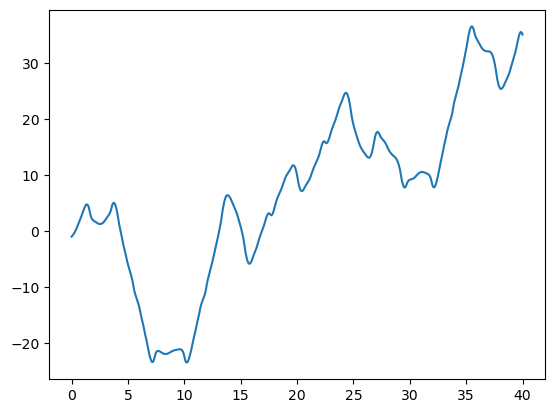

In [189]:
plt.plot(t, beta)

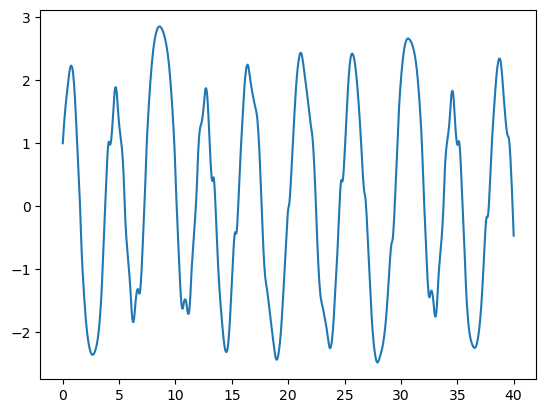

In [190]:
plt.plot(t, alpha)

In [191]:
def get_pstns(t,alpha,beta,l,h):
    return (l*np.sin(alpha),
            -l*np.cos(alpha),
            l*np.sin(alpha)+h*np.sin(beta),
            -l*np.cos(alpha)-h*np.cos(beta))

x1, y1, x2, y2 = get_pstns(t, answer.T[0], answer.T[2], l, h)

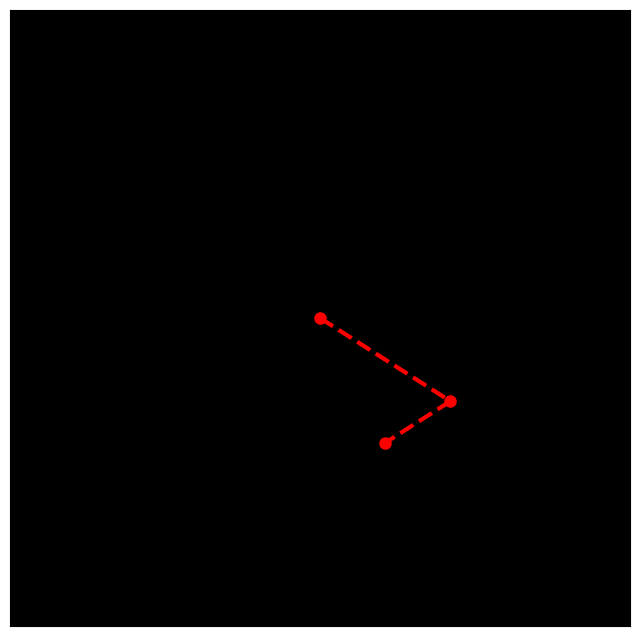

In [192]:
def animate(i):
    ln1.set_data([0, x1[i],x2[i]],[0, y1[i],y2[i]])

fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.set_facecolor('k')
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
ln1, = plt.plot([],[], 'ro--', lw=3,markersize=8)
ax.set_ylim(-4,4)
ax.set_xlim(-4,4)
ani= animation.FuncAnimation(fig, animate, frames=1000, interval=50)
ani.save('doublependulum.gif',writer='pillow',fps=25)